# Batch Normalization on CIFAR-10

In this notebook we implement batch normalization, which is an opimization method useful for deep feed-forward neural networks, such as deep CNNs. Here we implement it on a toy-model of fully-connected (dense) layers, and toy-data (CIFAR-10).

In addition to Batch Normalization, we demonstrate how to implement early stopping, saving a checkpoint model, and use Keras logging for Tensorboard.

The main takeaways from this notebook are to know how to implement in Keras:
1. Batch Normalization
2. Early Stopping
3. Saving Checkpoints
4. Default Keras Logs into Tensorboard

Based on the [notebook](https://github.com/ageron/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb) of Geron, chapter 11, exercise 8.
Presented here in accordance with the Apache 2.0 license.

In [ ]:
import tensorflow as tf

## Get the Data
CIFAR-10 dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes (for students: what is the difference between CIFAR-10 and MNIST in that sense?).

We get the data from tf.keras.datasets (similar to how we did for MNIST). This means that we get numpy array back.

As seen in the [dataset description](https://keras.io/api/datasets/cifar10/), the 10 classes are:

Label |	Description
--- | ---
0 |	airplane
1 |	automobile
2 |	bird
3 |	cat
4 |	deer
5 |	dog
6 |	frog
7 |	horse
8 |	ship
9 |	truck

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

# TODO: for the students: how many images are there in the training and the validation sets?
# TODO: for the students: what does 'x' and 'y' stand for?
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

## Data Exploration

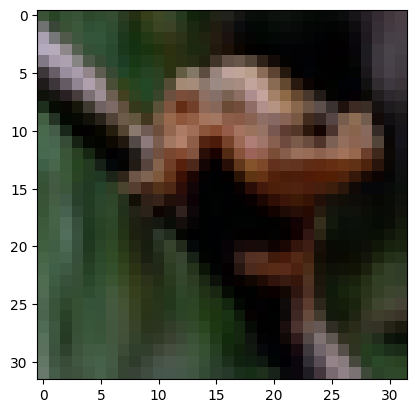

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
print(y_train[0])

[6]


In [ ]:
# TODO: for the students: which additional data explorations would you do?

## Define the Base Model
Here we build a DNN with 20 hidden layers of 100 neurons each.
That's too many, but it's the point of this exercise, because it allows us to use some of the optimization techniques we learned.

In [ ]:
# TODO: for the students: can you add comments to each line of code below explaining what it does and why?

# ?
tf.random.set_seed(42)

# ?
model = tf.keras.Sequential()
# ?
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
# ?
for _ in range(20):
    # ?
    model.add(tf.keras.layers.Dense(100,
                                    # ?
                                    activation="swish",
                                    # ?
                                    kernel_initializer="he_normal"))
# ?
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## Define the Loss Function, Optimizer and Metrics

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

## Define Callbacks for Early Stopping, Checkpoints, and Logging

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = f"./runs/cifar10_logs/run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

## Traing the Model
Before start running the training, initialize Tensorboard, such that you can view the training as it progresses.

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1402/1407 [============================>.] - ETA: 0s - loss: 4.2818 - accuracy: 0.1513

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 28s 15ms/step - loss: 4.2756 - accuracy: 0.1515 - val_loss: 2.1403 - val_accuracy: 0.2244
Epoch 2/100
1406/1407 [============================>.] - ETA: 0s - loss: 2.0810 - accuracy: 0.2313

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 2.0809 - accuracy: 0.2313 - val_loss: 1.9804 - val_accuracy: 0.2630
Epoch 3/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.9533 - accuracy: 0.2763

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.9534 - accuracy: 0.2763 - val_loss: 1.8966 - val_accuracy: 0.2916
Epoch 4/100
1407/1407 [==============================] - ETA: 0s - loss: 1.8783 - accuracy: 0.3088

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.8783 - accuracy: 0.3088 - val_loss: 1.8738 - val_accuracy: 0.3116
Epoch 5/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.8249 - accuracy: 0.3340

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.8247 - accuracy: 0.3341 - val_loss: 1.8041 - val_accuracy: 0.3430
Epoch 6/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7816 - accuracy: 0.3508

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.7817 - accuracy: 0.3507 - val_loss: 1.7502 - val_accuracy: 0.3600
Epoch 7/100
1407/1407 [==============================] - ETA: 0s - loss: 1.7318 - accuracy: 0.3694

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.7318 - accuracy: 0.3694 - val_loss: 1.7351 - val_accuracy: 0.3738
Epoch 8/100
1407/1407 [==============================] - ETA: 0s - loss: 1.7002 - accuracy: 0.3855

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 15ms/step - loss: 1.7002 - accuracy: 0.3855 - val_loss: 1.7028 - val_accuracy: 0.3880
Epoch 9/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6715 - accuracy: 0.3944

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.6713 - accuracy: 0.3944 - val_loss: 1.6720 - val_accuracy: 0.3976
Epoch 10/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6482 - accuracy: 0.4057 - val_loss: 1.6938 - val_accuracy: 0.3794
Epoch 11/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6274 - accuracy: 0.4125

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6271 - accuracy: 0.4126 - val_loss: 1.6652 - val_accuracy: 0.3930
Epoch 12/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6070 - accuracy: 0.4223

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6070 - accuracy: 0.4223 - val_loss: 1.6641 - val_accuracy: 0.4018
Epoch 13/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.5832 - accuracy: 0.4306

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 24s 17ms/step - loss: 1.5832 - accuracy: 0.4306 - val_loss: 1.6276 - val_accuracy: 0.4132
Epoch 14/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.5707 - accuracy: 0.4361

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.5707 - accuracy: 0.4361 - val_loss: 1.5913 - val_accuracy: 0.4286
Epoch 15/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5533 - accuracy: 0.4408 - val_loss: 1.5986 - val_accuracy: 0.4264
Epoch 16/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5401 - accuracy: 0.4478 - val_loss: 1.6042 - val_accuracy: 0.4256
Epoch 17/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.5272 - accuracy: 0.4525

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.5269 - accuracy: 0.4526 - val_loss: 1.5791 - val_accuracy: 0.4338
Epoch 18/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5127 - accuracy: 0.4584 - val_loss: 1.5860 - val_accuracy: 0.4356
Epoch 19/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.5001 - accuracy: 0.4649

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 22s 15ms/step - loss: 1.4998 - accuracy: 0.4650 - val_loss: 1.5625 - val_accuracy: 0.4378
Epoch 20/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4885 - accuracy: 0.4673 - val_loss: 1.6041 - val_accuracy: 0.4346
Epoch 21/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4793 - accuracy: 0.4708 - val_loss: 1.5934 - val_accuracy: 0.4312
Epoch 22/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4666 - accuracy: 0.4748 - val_loss: 1.5676 - val_accuracy: 0.4412
Epoch 23/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4566 - accuracy: 0.4794 - val_loss: 1.5868 - val_accuracy: 0.4334
Epoch 24/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4470 - accuracy: 0.4815 - val_loss: 1.5772 - val_accuracy: 0.4312
Epoch 25/100
1407/1407 [==============================] - ETA: 0s - loss: 1.4372 - accuracy: 0.4861

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4372 - accuracy: 0.4861 - val_loss: 1.5530 - val_accuracy: 0.4470
Epoch 26/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4283 - accuracy: 0.4871 - val_loss: 1.5633 - val_accuracy: 0.4374
Epoch 27/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4163 - accuracy: 0.4945 - val_loss: 1.5593 - val_accuracy: 0.4486
Epoch 28/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.4103 - accuracy: 0.4977

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.4105 - accuracy: 0.4976 - val_loss: 1.5404 - val_accuracy: 0.4464
Epoch 29/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.4002 - accuracy: 0.5010

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.4003 - accuracy: 0.5010 - val_loss: 1.5354 - val_accuracy: 0.4590
Epoch 30/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.3897 - accuracy: 0.5036 - val_loss: 1.5882 - val_accuracy: 0.4348
Epoch 31/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3853 - accuracy: 0.5033 - val_loss: 1.5682 - val_accuracy: 0.4512
Epoch 32/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.3757 - accuracy: 0.5078 - val_loss: 1.5412 - val_accuracy: 0.4554
Epoch 33/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3706 - accuracy: 0.5082

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 29s 21ms/step - loss: 1.3705 - accuracy: 0.5082 - val_loss: 1.5273 - val_accuracy: 0.4602
Epoch 34/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.3624 - accuracy: 0.5148 - val_loss: 1.5912 - val_accuracy: 0.4432
Epoch 35/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3501 - accuracy: 0.5182 - val_loss: 1.5656 - val_accuracy: 0.4510
Epoch 36/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3478 - accuracy: 0.5196 - val_loss: 1.5330 - val_accuracy: 0.4534
Epoch 37/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3353 - accuracy: 0.5208 - val_loss: 1.5402 - val_accuracy: 0.4610
Epoch 38/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3297 - accuracy: 0.5253 - val_loss: 1.5326 - val_accuracy: 0.4536
Epoch 39/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3222 - accuracy: 0.5285 - val_loss: 1.5674 

### Batch Normalization

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_bn_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = f"cifar10_logs/run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1405/1407 [============================>.] - ETA: 0s - loss: 2.0587 - accuracy: 0.2486

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 337s 30ms/step - loss: 2.0587 - accuracy: 0.2486 - val_loss: 1.9431 - val_accuracy: 0.3086
Epoch 2/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.7941 - accuracy: 0.3535

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 37s 26ms/step - loss: 1.7941 - accuracy: 0.3535 - val_loss: 1.8227 - val_accuracy: 0.3592
Epoch 3/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.6840 - accuracy: 0.3973

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 38s 27ms/step - loss: 1.6838 - accuracy: 0.3975 - val_loss: 1.7438 - val_accuracy: 0.3806
Epoch 4/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.6111 - accuracy: 0.4237

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 42s 30ms/step - loss: 1.6112 - accuracy: 0.4236 - val_loss: 1.6386 - val_accuracy: 0.4024
Epoch 5/100
1407/1407 [==============================] - 28s 20ms/step - loss: 1.5632 - accuracy: 0.4446 - val_loss: 1.6867 - val_accuracy: 0.3854
Epoch 6/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5128 - accuracy: 0.4652

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 54s 38ms/step - loss: 1.5128 - accuracy: 0.4652 - val_loss: 1.5506 - val_accuracy: 0.4396
Epoch 7/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.4671 - accuracy: 0.4799 - val_loss: 1.6614 - val_accuracy: 0.4240
Epoch 8/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.4302 - accuracy: 0.4938 - val_loss: 1.5765 - val_accuracy: 0.4292
Epoch 9/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3954 - accuracy: 0.5093

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 78s 55ms/step - loss: 1.3954 - accuracy: 0.5093 - val_loss: 1.5060 - val_accuracy: 0.4656
Epoch 10/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.3621 - accuracy: 0.5171 - val_loss: 1.5754 - val_accuracy: 0.4382
Epoch 11/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.3364 - accuracy: 0.5261 - val_loss: 1.5168 - val_accuracy: 0.4716
Epoch 12/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.3023 - accuracy: 0.5420 - val_loss: 1.6920 - val_accuracy: 0.4122
Epoch 13/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.2783 - accuracy: 0.5467 - val_loss: 1.5458 - val_accuracy: 0.4648
Epoch 14/100
1407/1407 [==============================] - ETA: 0s - loss: 1.2533 - accuracy: 0.5555

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 68s 49ms/step - loss: 1.2533 - accuracy: 0.5555 - val_loss: 1.4674 - val_accuracy: 0.4842
Epoch 15/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.2316 - accuracy: 0.5633 - val_loss: 1.6214 - val_accuracy: 0.4560
Epoch 16/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.2135 - accuracy: 0.5704 - val_loss: 1.5224 - val_accuracy: 0.4748
Epoch 17/100
1407/1407 [==============================] - 48s 34ms/step - loss: 1.1919 - accuracy: 0.5789 - val_loss: 1.4811 - val_accuracy: 0.4776
Epoch 18/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.1708 - accuracy: 0.5856 - val_loss: 1.5899 - val_accuracy: 0.4480
Epoch 19/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.1602 - accuracy: 0.5932 - val_loss: 1.6210 - val_accuracy: 0.4552
Epoch 20/100
1407/1407 [==============================] - 47s 34ms/step - loss: 1.1358 - accuracy: 0.5994 - val_loss: 1.5326 

[1.4674395322799683, 0.48420000076293945]